<h3>6.1 卷积神经网络简介</h3>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=5,stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=36,kernel_size=5,stride=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dense1 = nn.Linear(900,128)
        self.dense2 = nn.Linear(128,10)

    def forward(self,x):
        x=self.pool1(F.relu(self.conv1(x)))
        x=self.pool2(F.relu(self.conv2(x)))
        x=x.view(-1,900)
        x=F.relu(self.dense2(F.relu(self.dense1(x))))
        return x

net = CNNNet()
net = net.to(device)

<h3>6.3 池化层</h3>

In [3]:
# 池化窗口为正方形 size=3, stride=2
m1 = nn.MaxPool2d(3, stride=2)
# 池化窗口为非正方形
m2 = nn.MaxPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
output = m2(input)
print(output.shape)

torch.Size([20, 16, 24, 31])


6.3.2 全局池化

In [4]:
# 输出大小为5x7
m = nn.AdaptiveMaxPool2d((5,7))
input = torch.randn(1, 64, 8, 9)
output = m(input)
print(output.size())
# t输出大小为正方形 7x7
m = nn.AdaptiveMaxPool2d(7)
input = torch.randn(1, 64, 10, 9)
output = m(input)
print(output.size())
# 输出大小为 10x7
m = nn.AdaptiveMaxPool2d((None, 7))
input = torch.randn(1, 64, 10, 9)
output = m(input)
print(output.size())
# 输出大小为 1x1
m = nn.AdaptiveMaxPool2d((1))
input = torch.randn(1, 64, 10, 9)
output = m(input)
print(output.size())

torch.Size([1, 64, 5, 7])
torch.Size([1, 64, 7, 7])
torch.Size([1, 64, 10, 7])
torch.Size([1, 64, 1, 1])


<h3>6.5 Pytorch实现cifar10多分类</h3>

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
# 报错1：OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized
# 解决方案：https://blog.csdn.net/jialibang/article/details/107392240
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 报错2：BrokenPipeError: [Errno 32] Broken pipe
# 由于windows下多线程的问题，和DataLoader类有关，修改调用torch.utils.data.DataLoader()函数时的 num_workers 参数 改为0
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

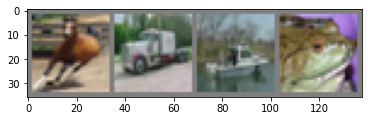

horse truck  ship  frog


In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 显示图像

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    # np.transpose 对高维矩阵进行轴对换
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 随机获取部分训练数据
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

6.5.3 构建网络

In [8]:
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=5,stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=36,kernel_size=3,stride=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(1296,128)
        self.fc2 = nn.Linear(128,10)

    def forward(self,x):
        x=self.pool1(F.relu(self.conv1(x)))
        x=self.pool2(F.relu(self.conv2(x)))
        #print(x.shape)
        x=x.view(-1,36*6*6)
        x=F.relu(self.fc2(F.relu(self.fc1(x))))
        return x

net = CNNNet()
net = net.to(device)

In [9]:
# 查看参数总量
print("net have {} paramerters in total".format(sum(x.numel() for x in net.parameters())))

net have 173742 paramerters in total


In [10]:
import torch.optim as optim
LR = 0.001

# 交叉熵损失函数
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(net.parameters(), lr=LR)

In [11]:
print(net)

CNNNet(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 36, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1296, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [12]:
#取模型中的前四层
nn.Sequential(*list(net.children())[:4])

Sequential(
  (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(16, 36, kernel_size=(3, 3), stride=(1, 1))
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

6.5.4 训练模型

In [13]:
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取训练数据
        # input size维[4, 3, 32, 32]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # 权重参数梯度清零
        optimizer.zero_grad()

        # 正向及反向传播
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 显示损失值
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.109
[1,  4000] loss: 1.699
[1,  6000] loss: 1.513
[1,  8000] loss: 1.418
[1, 10000] loss: 1.353
[1, 12000] loss: 1.256
[2,  2000] loss: 1.191
[2,  4000] loss: 1.138
[2,  6000] loss: 1.124
[2,  8000] loss: 1.095
[2, 10000] loss: 1.066
[2, 12000] loss: 1.046
[3,  2000] loss: 0.942
[3,  4000] loss: 0.943
[3,  6000] loss: 0.958
[3,  8000] loss: 0.925
[3, 10000] loss: 0.919
[3, 12000] loss: 0.926
[4,  2000] loss: 0.771
[4,  4000] loss: 0.806
[4,  6000] loss: 0.809
[4,  8000] loss: 0.837
[4, 10000] loss: 0.828
[4, 12000] loss: 0.825
[5,  2000] loss: 0.655
[5,  4000] loss: 0.710
[5,  6000] loss: 0.712
[5,  8000] loss: 0.746
[5, 10000] loss: 0.750
[5, 12000] loss: 0.741
[6,  2000] loss: 0.593
[6,  4000] loss: 0.598
[6,  6000] loss: 0.632
[6,  8000] loss: 0.656
[6, 10000] loss: 0.644
[6, 12000] loss: 0.675
[7,  2000] loss: 0.502
[7,  4000] loss: 0.539
[7,  6000] loss: 0.519
[7,  8000] loss: 0.586
[7, 10000] loss: 0.591
[7, 12000] loss: 0.605
[8,  2000] loss: 0.420
[8,  4000] 

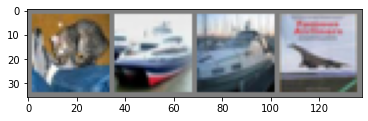

GroundTruth:    cat  ship  ship plane


In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# images, labels = images.to(device), labels.to(device)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
images, labels = images.to(device), labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(4)))

Predicted:    cat  ship   car plane


6.5.5 测试模型

In [16]:
correct = 0
total = 0
# torch.no_grad()
# 在该模块下，所有计算得出的tensor的requires_grad都自动设置为False
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


In [17]:
# 各种类别的准确率
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 78 %
Accuracy of  bird : 52 %
Accuracy of   cat : 50 %
Accuracy of  deer : 68 %
Accuracy of   dog : 54 %
Accuracy of  frog : 76 %
Accuracy of horse : 70 %
Accuracy of  ship : 83 %
Accuracy of truck : 71 %


6.5.6 采用全局平均池化

In [18]:
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 36, 5)
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.pool2 = nn.MaxPool2d(2, 2)
        # 使用全局平均池化层
        self.aap=nn.AdaptiveAvgPool2d(1)
        self.fc3 = nn.Linear(36, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.aap(x)
        x = x.view(x.shape[0], -1)
        x = self.fc3(x)
        return x

net = Net()
net = net.to(device)

In [19]:
print("net_gvp have {} paramerters in total".format(sum(x.numel() for x in net.parameters())))

net_gvp have 16022 paramerters in total


In [20]:
import torch.optim as optim
LR = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取训练数据
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # 权重参数梯度清零
        optimizer.zero_grad()

        # 正向及反向传播
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 显示损失值
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.133
[1,  4000] loss: 1.865
[1,  6000] loss: 1.762
[1,  8000] loss: 1.657
[1, 10000] loss: 1.602
[1, 12000] loss: 1.551
[2,  2000] loss: 1.507
[2,  4000] loss: 1.469
[2,  6000] loss: 1.457
[2,  8000] loss: 1.437
[2, 10000] loss: 1.402
[2, 12000] loss: 1.379
[3,  2000] loss: 1.337
[3,  4000] loss: 1.319
[3,  6000] loss: 1.304
[3,  8000] loss: 1.315
[3, 10000] loss: 1.306
[3, 12000] loss: 1.281
[4,  2000] loss: 1.254
[4,  4000] loss: 1.250
[4,  6000] loss: 1.252
[4,  8000] loss: 1.229
[4, 10000] loss: 1.217
[4, 12000] loss: 1.188
[5,  2000] loss: 1.180
[5,  4000] loss: 1.191
[5,  6000] loss: 1.157
[5,  8000] loss: 1.149
[5, 10000] loss: 1.178
[5, 12000] loss: 1.144
[6,  2000] loss: 1.144
[6,  4000] loss: 1.124
[6,  6000] loss: 1.114
[6,  8000] loss: 1.104
[6, 10000] loss: 1.110
[6, 12000] loss: 1.106
[7,  2000] loss: 1.078
[7,  4000] loss: 1.083
[7,  6000] loss: 1.066
[7,  8000] loss: 1.057
[7, 10000] loss: 1.088
[7, 12000] loss: 1.062
[8,  2000] loss: 1.050
[8,  4000] 

6.5.7 像keras一样显示各层参数

In [22]:
import collections
import torch

def paras_summary(input_size, model):
    def register_hook(module):
        def hook(module, input, output):
            class_name = str(module.__class__).split('.')[-1].split("'")[0]
            module_idx = len(summary)

            m_key = '%s-%i' % (class_name, module_idx+1)
            summary[m_key] = collections.OrderedDict()
            summary[m_key]['input_shape'] = list(input[0].size())
            summary[m_key]['input_shape'][0] = -1
            summary[m_key]['output_shape'] = list(output.size())
            summary[m_key]['output_shape'][0] = -1

            params = 0
            if hasattr(module, 'weight'):
                params += torch.prod(torch.LongTensor(list(module.weight.size())))
                if module.weight.requires_grad:
                    summary[m_key]['trainable'] = True
                else:
                    summary[m_key]['trainable'] = False
            if hasattr(module, 'bias'):
                params +=  torch.prod(torch.LongTensor(list(module.bias.size())))
            summary[m_key]['nb_params'] = params

        if not isinstance(module, nn.Sequential) and \
           not isinstance(module, nn.ModuleList) and \
           not (module == model):
            hooks.append(module.register_forward_hook(hook))

    # check if there are multiple inputs to the network
    if isinstance(input_size[0], (list, tuple)):
        x = [torch.rand(1,*in_size) for in_size in input_size]
    else:
        x = torch.rand(1,*input_size)

    # create properties
    summary = collections.OrderedDict()
    hooks = []
    # register hook
    model.apply(register_hook)
    # make a forward pass
    model(x)
    # remove these hooks
    for h in hooks:
        h.remove()

    return summary

In [23]:
net = CNNNet()
input_size=[3,32,32]
paras_summary(input_size,net)


OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 16, 28, 28]),
                           ('trainable', True),
                           ('nb_params', tensor(1216))])),
             ('MaxPool2d-2',
              OrderedDict([('input_shape', [-1, 16, 28, 28]),
                           ('output_shape', [-1, 16, 14, 14]),
                           ('nb_params', 0)])),
             ('Conv2d-3',
              OrderedDict([('input_shape', [-1, 16, 14, 14]),
                           ('output_shape', [-1, 36, 12, 12]),
                           ('trainable', True),
                           ('nb_params', tensor(5220))])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 36, 12, 12]),
                           ('output_shape', [-1, 36, 6, 6]),
                           ('nb_params', 0)])),
             ('Linear-5',
              OrderedDict([('input_shape', [-1, 1296]),
 